In [14]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})
import os
import sys

sys.path.append(os.path.abspath('../..'))
from modules import io

In [19]:
#MODEL = "0110"

MODEL = "0144"

#MODEL = "coronary"

# PATHS = [
# "aorta",
# "right_iliac"   
# ]

# PATHS_LABEL = [
# "aorta",
# "aorta",
# "leff iliac"   
# ]

PATHS = [
"aorta",   
"celiac_hepatic",
"celiac_splenic",
"ext_iliac_left",
"renal_left",
"renal_right",
"SMA"
]

PATHS_LABEL = [
"aorta",
"celiac hepatic",
"celiac splenic",
"ext iliac left",
"renal left",
"renal right",
"SMA"    
]

# PATHS = ["lc1",
#         "lc1_sub1",
#         "lc1_sub2",
#         "lc1_sub3",
#         "lc2",
#         "lc2_sub1"
# ]

# PATHS_LABEL = ["$LCx$",
#         "$LCx-OM_1$",
#         "$LCx-OM_2$",
#         "$LCx-OM_3$",
#         "$LAD$",
#         "$LAD-D_1$"
# ]

CASE  = "sim_wom_rcr"
#CASE  = "sim_cor_inflow"

mesh  = "coarse"

gen   = 2

quants   = [
 #"area",
 "radius_actual",
 "pressure_0",
 "vWSS_3_boundary",
 "velocity_3"
]

labels = [
    r"radius $(cm)$",
    r"pressure $(mmHg)$",
    r"TAWSS magnitude $(dyne/cm^2)$",
    r"Velocity magnitude $(cm/s)$"
]

models   = list(range(500))
dt       = 0.004

DIR = "/media/marsdenlab/Data1/UQ/"+MODEL+"/"+CASE+"/csv/"+str(gen)+"_edit.csv"
    
df = pd.read_csv(DIR)


In [20]:
#df.iloc[:5]['path']
df_group = df.groupby(["path","model","time"]).mean()\
.groupby(['path','model']).mean()\
.groupby('path')

#print(df_group.get_group("aorta").groupby('model').mean())

In [21]:
print(quants)
for j,path in enumerate(PATHS):
    data = df_group.get_group(path)
    s = PATHS_LABEL[j]

    for i,q in enumerate(quants):
    
        mu  = data.mean()[q]
        std = data.std()[q]
        cv  = std*1.0/mu
        
        std_mc = std/np.sqrt(len(data))
        cv_mc  = std_mc/mu
        #print("{} - {:.2f} - {:.3f} - {:.3f} - {:.3f}".format(q,mu,std,cv,cv_mc))
        
        s = s + " & {:.2f} & {:.4f}".format(mu,2*cv_mc)
        
    print(s)

['radius_actual', 'pressure_0', 'vWSS_3_boundary', 'velocity_3']
aorta & 0.63 & 0.0012 & 96.45 & 0.0007 & 47.66 & 0.0044 & 38.05 & 0.0028
celiac hepatic & 0.26 & 0.0032 & 89.11 & 0.0008 & 125.70 & 0.0073 & 79.84 & 0.0065
celiac splenic & 0.36 & 0.0028 & 94.51 & 0.0008 & 85.11 & 0.0062 & 52.21 & 0.0036
ext iliac left & 0.38 & 0.0035 & 94.35 & 0.0006 & 58.47 & 0.0064 & 43.88 & 0.0048
renal left & 0.32 & 0.0033 & 95.29 & 0.0007 & 87.28 & 0.0065 & 51.43 & 0.0034
renal right & 0.29 & 0.0038 & 92.35 & 0.0008 & 117.50 & 0.0079 & 66.67 & 0.0052
SMA & 0.38 & 0.0027 & 99.26 & 0.0008 & 35.35 & 0.0061 & 31.98 & 0.0043


In [22]:
print(quants)
for j,path in enumerate(PATHS):
    data = df_group.get_group(path)
    
    s = PATHS_LABEL[j]

    for i,q in enumerate(quants):
    
        mu  = data.mean()[q]
        std = data.std()[q]
        cv  = std*1.0/mu

        std_mc = std/np.sqrt(len(data))
        cv_mc  = std_mc/mu
        #print("{} - {:.2f} - {:.3f} - {:.3f} - {:.3f}".format(q,mu,std,cv,cv_mc))
        
        s = s + " & {:.2f} & {:.3f}".format(mu,cv)
        
    print(s)

['radius_actual', 'pressure_0', 'vWSS_3_boundary', 'velocity_3']
aorta & 0.63 & 0.007 & 96.45 & 0.004 & 47.66 & 0.024 & 38.05 & 0.015
celiac hepatic & 0.26 & 0.018 & 89.11 & 0.004 & 125.70 & 0.040 & 79.84 & 0.036
celiac splenic & 0.36 & 0.016 & 94.51 & 0.004 & 85.11 & 0.034 & 52.21 & 0.020
ext iliac left & 0.38 & 0.019 & 94.35 & 0.004 & 58.47 & 0.035 & 43.88 & 0.027
renal left & 0.32 & 0.018 & 95.29 & 0.004 & 87.28 & 0.036 & 51.43 & 0.019
renal right & 0.29 & 0.021 & 92.35 & 0.005 & 117.50 & 0.043 & 66.67 & 0.028
SMA & 0.38 & 0.015 & 99.26 & 0.004 & 35.35 & 0.034 & 31.98 & 0.024


['radius_actual', 'pressure_0', 'vWSS_3_boundary', 'velocity_3']


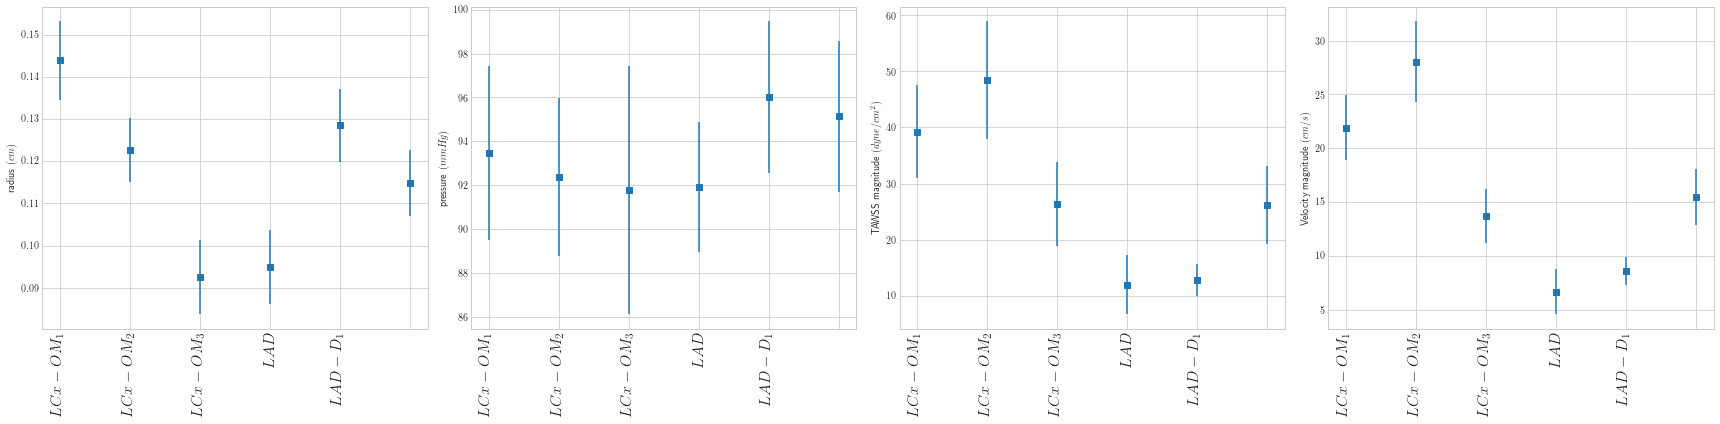

In [6]:
print(quants)

Size  = 6
count = 0
Wplot = len(labels)
f, axarr = plt.subplots(1, Wplot, figsize=(Wplot*Size,Size))

for i,q in enumerate(quants):
    
    vals = []
    errs = []
    x = range(len(PATHS))
    for path in PATHS:
        data = df_group.get_group(path).groupby("model").mean()

        mu  = data[q].mean()
        std = data[q].std()
        cv  = std*1.0/mu

        std_mc = std/np.sqrt(len(data[q]))
        cv_mc  = std_mc/mu
        
        vals.append(mu)
        errs.append(std*2)
        
    axarr[i].errorbar(x,vals,errs, marker='s',linestyle='')
    axarr[i].set_ylabel(labels[i])
    axarr[i].set_xticklabels(PATHS_LABEL, rotation='vertical', fontsize=16)

plt.tight_layout()
plt.savefig("ah.pdf",dpi=300)
plt.show()
plt.close()